# Homework (15 pts) - Classification

In [10]:
# Questions are based on the mouse cortex protein expression level dataset used in lecture.
# The Data_Cortex_Nuclear.csv file is available in the same folder as this notebook
# or at https://www.kaggle.com/ruslankl/mice-protein-expression
import pandas as pd
df = pd.read_csv('Data_Cortex_Nuclear.csv')
df

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


---
1. (3 pts) Remove all mice/samples with missing measurements from the dataframe. Store the result in the `df` variable for use with subsequent questions.

In [11]:
df = df.dropna()

---
2. (3 pts) Use a random forest classifier with 100 trees to predict whether a mouse was either memantine or saline treated based on their protein expression profile. Use `GridSearchCV` to tune the hyperparameter `max_depth` by testing on tree max depths from 2-20. Report the optimal `max_depth` for this classifier.

In [12]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

X = df.loc[:,'DYRK1A_N':'CaNA_N']
y = df['Treatment']

model = RandomForestClassifier(n_estimators=100)
params = {'max_depth': np.arange(2, 21)}
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
cv = GridSearchCV(model, params, cv=kf, scoring='accuracy')
cv.fit(X, y)
cv.best_params_

{'max_depth': 13}

---
3. (3 pts) For the random forest classifier with `max_depth` tuned, compute and display a confusion matrices based on cross validated predictions for each sample.

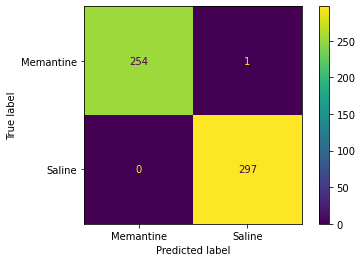

In [17]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model = RandomForestClassifier(n_estimators=100, max_depth=13)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
y_pred = cross_val_predict(model, X, y, cv=kf)

cm = confusion_matrix(y, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y.unique())
cmd.plot();

---
4. (3 pts) For the random forest classifier with `max_depth` tuned, plot the ROC curve based on cross validated predictions for Memantine treatment.

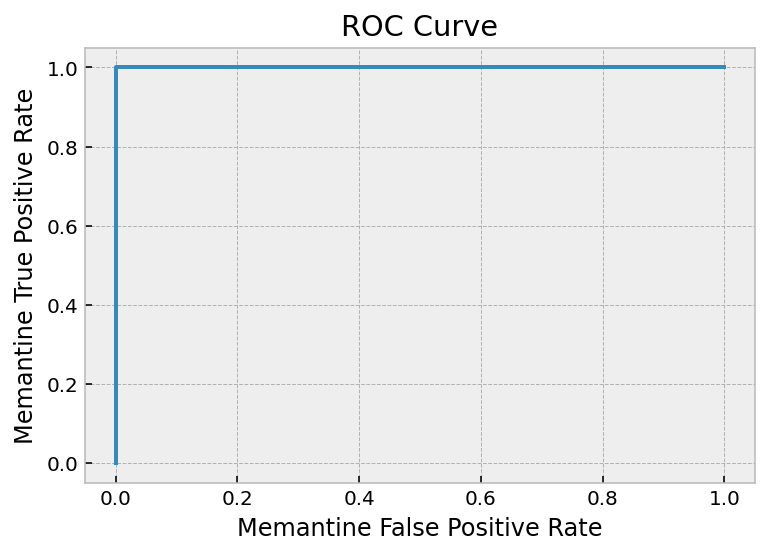

In [23]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')

model = RandomForestClassifier(n_estimators=100, max_depth=13)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
y_proba = cross_val_predict(model, X, y, cv=kf, method='predict_proba')

fpr, tpr, thresholds = roc_curve(y, y_proba[:,0], pos_label='Memantine')
plt.plot(fpr, tpr, label='Memantine')
plt.xlabel('Memantine False Positive Rate')
plt.ylabel('Memantine True Positive Rate')
plt.title('ROC Curve');

---
5. (3 pts) Use a random forest with 100 trees and the same `max_depth` hyperparameter as tuned above to classify the mice into each of the 8 classes defined by genotype, fear conditioning and treatment based on their protein expression profiles. Repeat this classification 77 separate times, where on the ith time you will use only the first i proteins. For example, the 1st time you will only use expression of DYRK1A_N, the 2nd time you will use both DYRK1A_N and ITSN1_N as predictive features, the 3rd time DYRK1A_N, ITSN1_N and BDNF_N, etc. until the 77th time you will use all 77 proteins from DYRK1A_N to CaNA_N. Plot the mean cross validated accuracy of the classifier as a function of the number of protein features used as predictors. *Hint: You may want to use `tqdm` as a progress indicator.*

100%|█████████████████████████████████████████████████████████████████████████████| 77/77 [02:15<00:00,  1.76s/it]


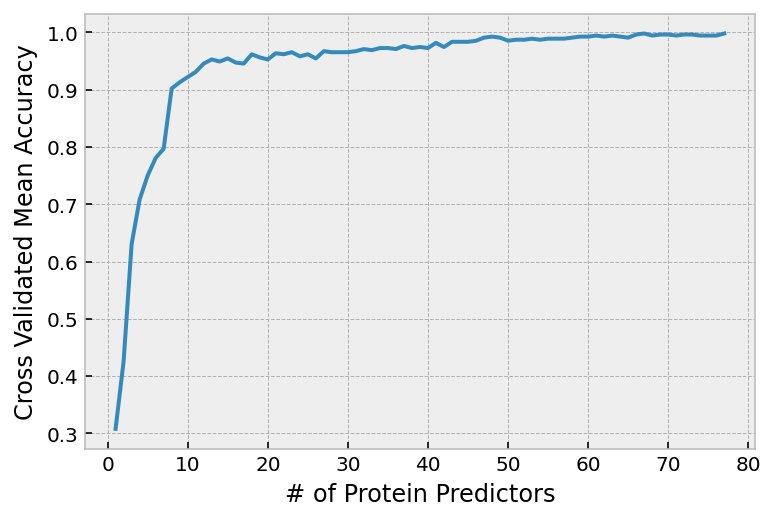

In [25]:
from sklearn.model_selection import cross_val_score
from tqdm import tqdm

X = df.loc[:,'DYRK1A_N':'CaNA_N']
y = df['class']

model = RandomForestClassifier(n_estimators=100, max_depth=13)
mean_accuracy = np.zeros(77)
for i in tqdm(range(77)):
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    mean_accuracy[i] = cross_val_score(model, X.iloc[:,:i+1], y, cv=kf).mean()

plt.plot(range(1,78), mean_accuracy)
plt.xlabel('# of Protein Predictors')
plt.ylabel('Cross Validated Mean Accuracy');